In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Load The data - Step 1

In [4]:
df= pd.read_csv("SalesDataAdidas.csv", header=4)
df.head(3)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   02-01-2020  Northeast  New York  New York   
2  Foot Locker      1185732   03-01-2020  Northeast  New York  New York   

                   Product Price per Unit Units Sold Total Sales  \
0    Men's Street Footwear        $50.00       1,200  $6,00,000    
1  Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2  Women's Street Footwear        $40.00       1,000  $4,00,000    

  Operating Profit Operating Margin Sales Method  
0       $3,00,000               50%     In-store  
1       $1,50,000               30%     In-store  
2       $1,40,000               35%     In-store

## Handling Missing Value 

In [7]:
print(df.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [9]:
df.drop_duplicates().head(3)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   02-01-2020  Northeast  New York  New York   
2  Foot Locker      1185732   03-01-2020  Northeast  New York  New York   

                   Product Price per Unit Units Sold Total Sales  \
0    Men's Street Footwear        $50.00       1,200  $6,00,000    
1  Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2  Women's Street Footwear        $40.00       1,000  $4,00,000    

  Operating Profit Operating Margin Sales Method  
0       $3,00,000               50%     In-store  
1       $1,50,000               30%     In-store  
2       $1,40,000               35%     In-store

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


__Change Data Type for Easy Analaysis__

In [14]:
from datetime import datetime as dt
df['Invoice Date']=pd.to_datetime(df['Invoice Date'],  format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 980.0+ KB


In [16]:
convert_column=[ 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
for col in convert_column:
   df[col]=pd.to_numeric(df[col].str.replace('[\$,]','', regex=True).replace(',','',regex=True),errors='coerce').astype(float)
df['Operating Margin'] = df['Operating Margin'].str.rstrip('%').astype(float)

In [18]:
df['Total Sales']=df['Price per Unit']*df['Units Sold']
df['Operating Profit']=df['Total Sales']*df['Operating Margin']/100
df['Year']=df['Invoice Date'].dt.year
df['Month']=df['Invoice Date'].dt.month
df["Gender"]=df["Product"].str.contains("Men")
df.Gender=df.Gender.map({True:"Male", False:"Female"})
df=df.rename(columns={'Operating Margin':'Operating Margin %'})
df.head(1)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   

                 Product  Price per Unit  Units Sold  Total Sales  \
0  Men's Street Footwear            50.0      1200.0      60000.0   

   Operating Profit  Operating Margin % Sales Method  Year  Month Gender  
0           30000.0                50.0     In-store  2020      1   Male

In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Retailer            9648 non-null   object        
 1   Retailer ID         9648 non-null   int64         
 2   Invoice Date        9648 non-null   datetime64[ns]
 3   Region              9648 non-null   object        
 4   State               9648 non-null   object        
 5   City                9648 non-null   object        
 6   Product             9648 non-null   object        
 7   Price per Unit      9648 non-null   float64       
 8   Units Sold          9648 non-null   float64       
 9   Total Sales         9648 non-null   float64       
 10  Operating Profit    9648 non-null   float64       
 11  Operating Margin %  9648 non-null   float64       
 12  Sales Method        9648 non-null   object        
 13  Year                9648 non-null   int32       

## Exploratory Data Analysis 

__Descriptive Statistics__

In [24]:
Summary_Stats= df.describe()
print(Summary_Stats)

        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold   Total Sales  Operating Profit  Operating Margin %  \
count  9648.000000   9648.000000       9648.000000         9648.000000   
mean    256.930037  12455.083955       4894.793501           42.299129   
min       0.000000      0.000000          0.000000           10.000000   
25%     106.000000   4065.250000       1753.440000           35.000000   

__Correlation Analysis__

In [27]:
correlation= df['Total Sales'].corr(df['Units Sold'])
print(f"Correlation Coefficient between Total Sales and Units Sold:{correlation:.2f}")

Correlation Coefficient between Total Sales and Units Sold:0.92


__Correlation Matrix__

In [30]:
OverallCorrealtion=df[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin %']].corr()
OverallCorrealtion

Price per Unit  Units Sold  Total Sales  Operating Profit  \
Price per Unit            1.000000    0.265869     0.539547          0.503683   
Units Sold                0.265869    1.000000     0.919339          0.871993   
Total Sales               0.539547    0.919339     1.000000          0.935372   
Operating Profit          0.503683    0.871993     0.935372          1.000000   
Operating Margin %       -0.137486   -0.305479    -0.302295         -0.047491   

                    Operating Margin %  
Price per Unit               -0.137486  
Units Sold                   -0.305479  
Total Sales                  -0.302295  
Operating Profit             -0.047491  
Operating Margin %            1.000000

__Correaltion Matrix - Heat Map__

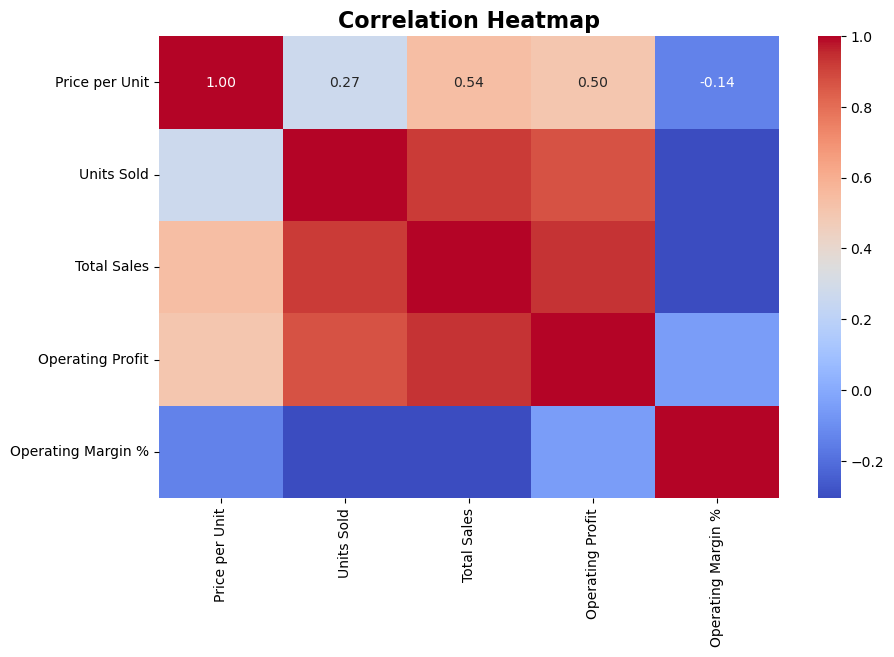

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(OverallCorrealtion, annot= True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

__Profitability Analysis__

In [35]:
df['Operating Margin %'] = (df['Operating Profit'] / df['Total Sales']) * 100
profitability_summary = df.groupby('Region').agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin %': 'mean'
}).reset_index()
print(profitability_summary)

      Region  Total Sales  Operating Profit  Operating Margin %
0    Midwest   16674434.0        6859945.23           43.519807
1  Northeast   25078267.0        9732773.90           41.045034
2      South   20603356.0        9221605.32           46.689815
3  Southeast   21374436.0        8393059.20           41.916667
4       West   36436157.0       13017584.05           39.669118


__Bar Plot for Total Profit and Total sales by Region__

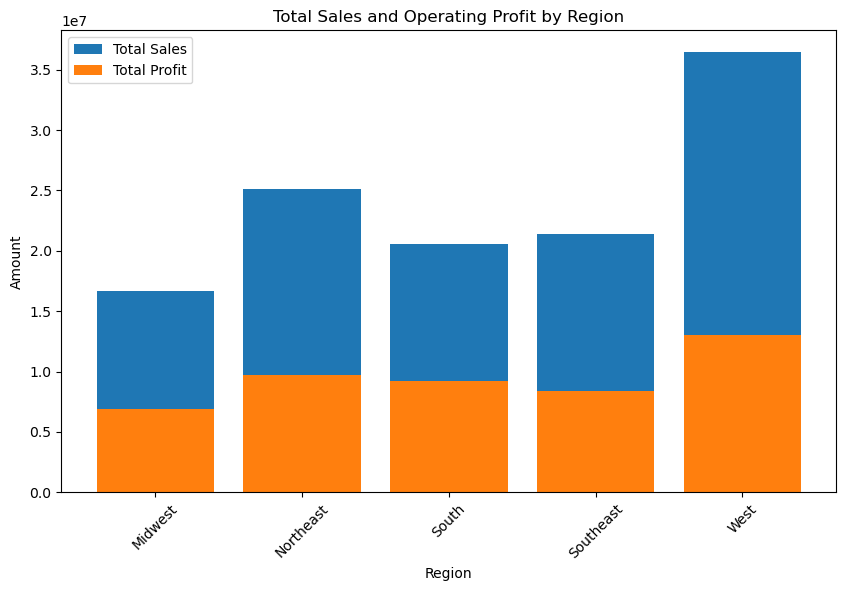

In [39]:
plt.figure(figsize=(10,6))
plt.bar(profitability_summary['Region'], profitability_summary['Total Sales'], label='Total Sales')
plt.bar(profitability_summary['Region'], profitability_summary['Operating Profit'], label='Total Profit')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Total Sales and Operating Profit by Region')
plt.xticks(rotation=45)
plt.legend()
plt.show()

__Frequency of Retailer, Product , Region , Sate and City__

In [42]:
RetailerCount = df.Retailer.value_counts()
RegionCount = df.Region.value_counts()
ProductCount = df.Product.value_counts()
StateCount = df['State'].value_counts().nlargest(10)

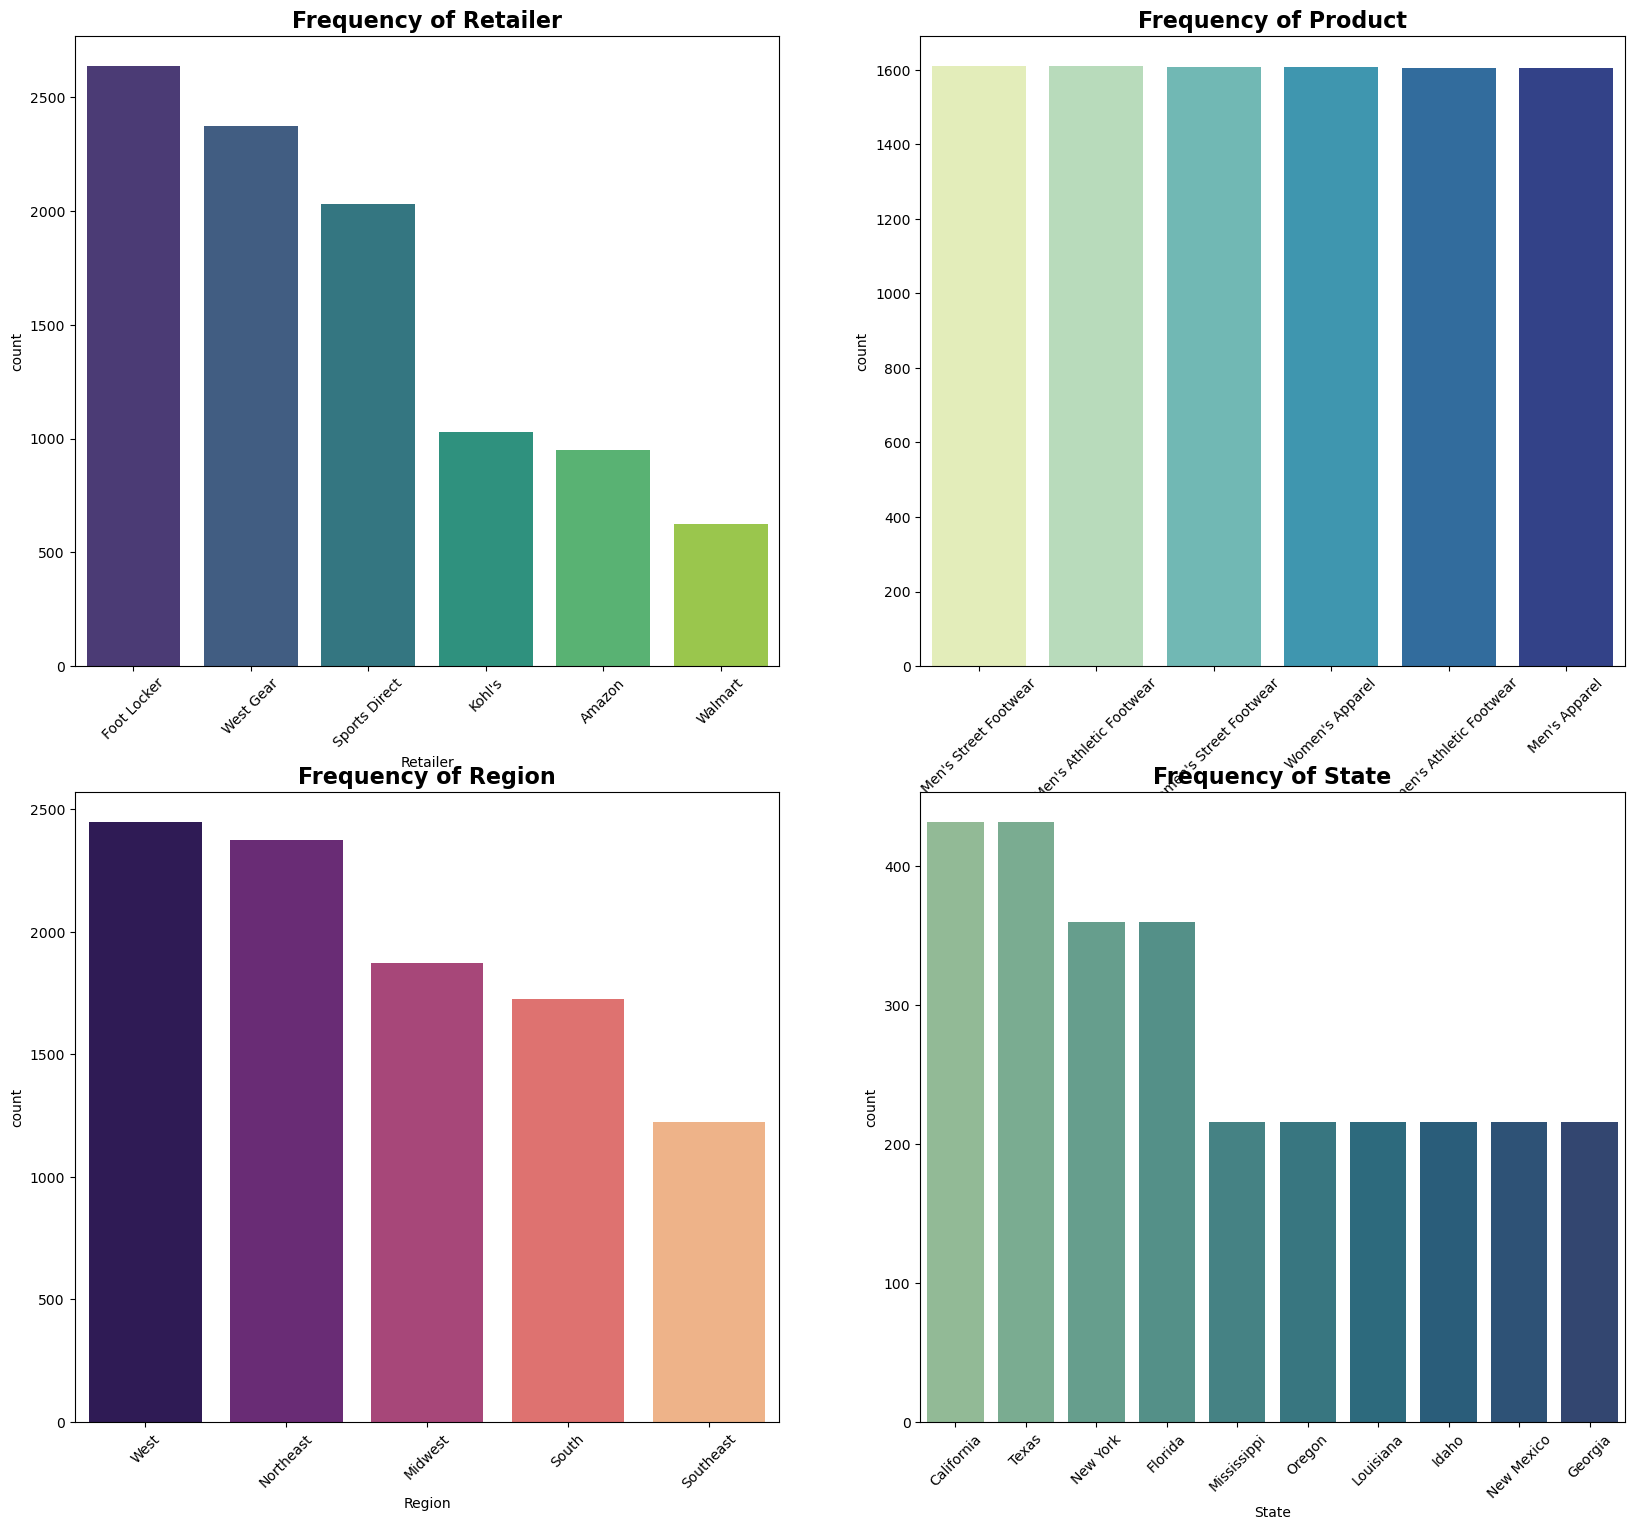

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
sns.countplot(data=df, x="Retailer", order=df.Retailer.value_counts().index,palette='viridis', ax=axes[0,0])
axes[0,0].set_title("Frequency of Retailer", fontsize=16, fontweight='bold' )
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Product", order=df.Product.value_counts().index,palette='YlGnBu', ax=axes[0,1])
axes[0,1].set_title("Frequency of Product",fontsize=16, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Region", order=df.Region.value_counts().index,palette='magma', ax=axes[1,0])
axes[1,0].set_title("Frequency of Region",fontsize=16, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="State", order=StateCount.index,palette='crest', ax=axes[1,1])
axes[1,1].set_title("Frequency of State",fontsize=16, fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.show()

__Sales, Profit and Product Sold Comparison Between Different Group__

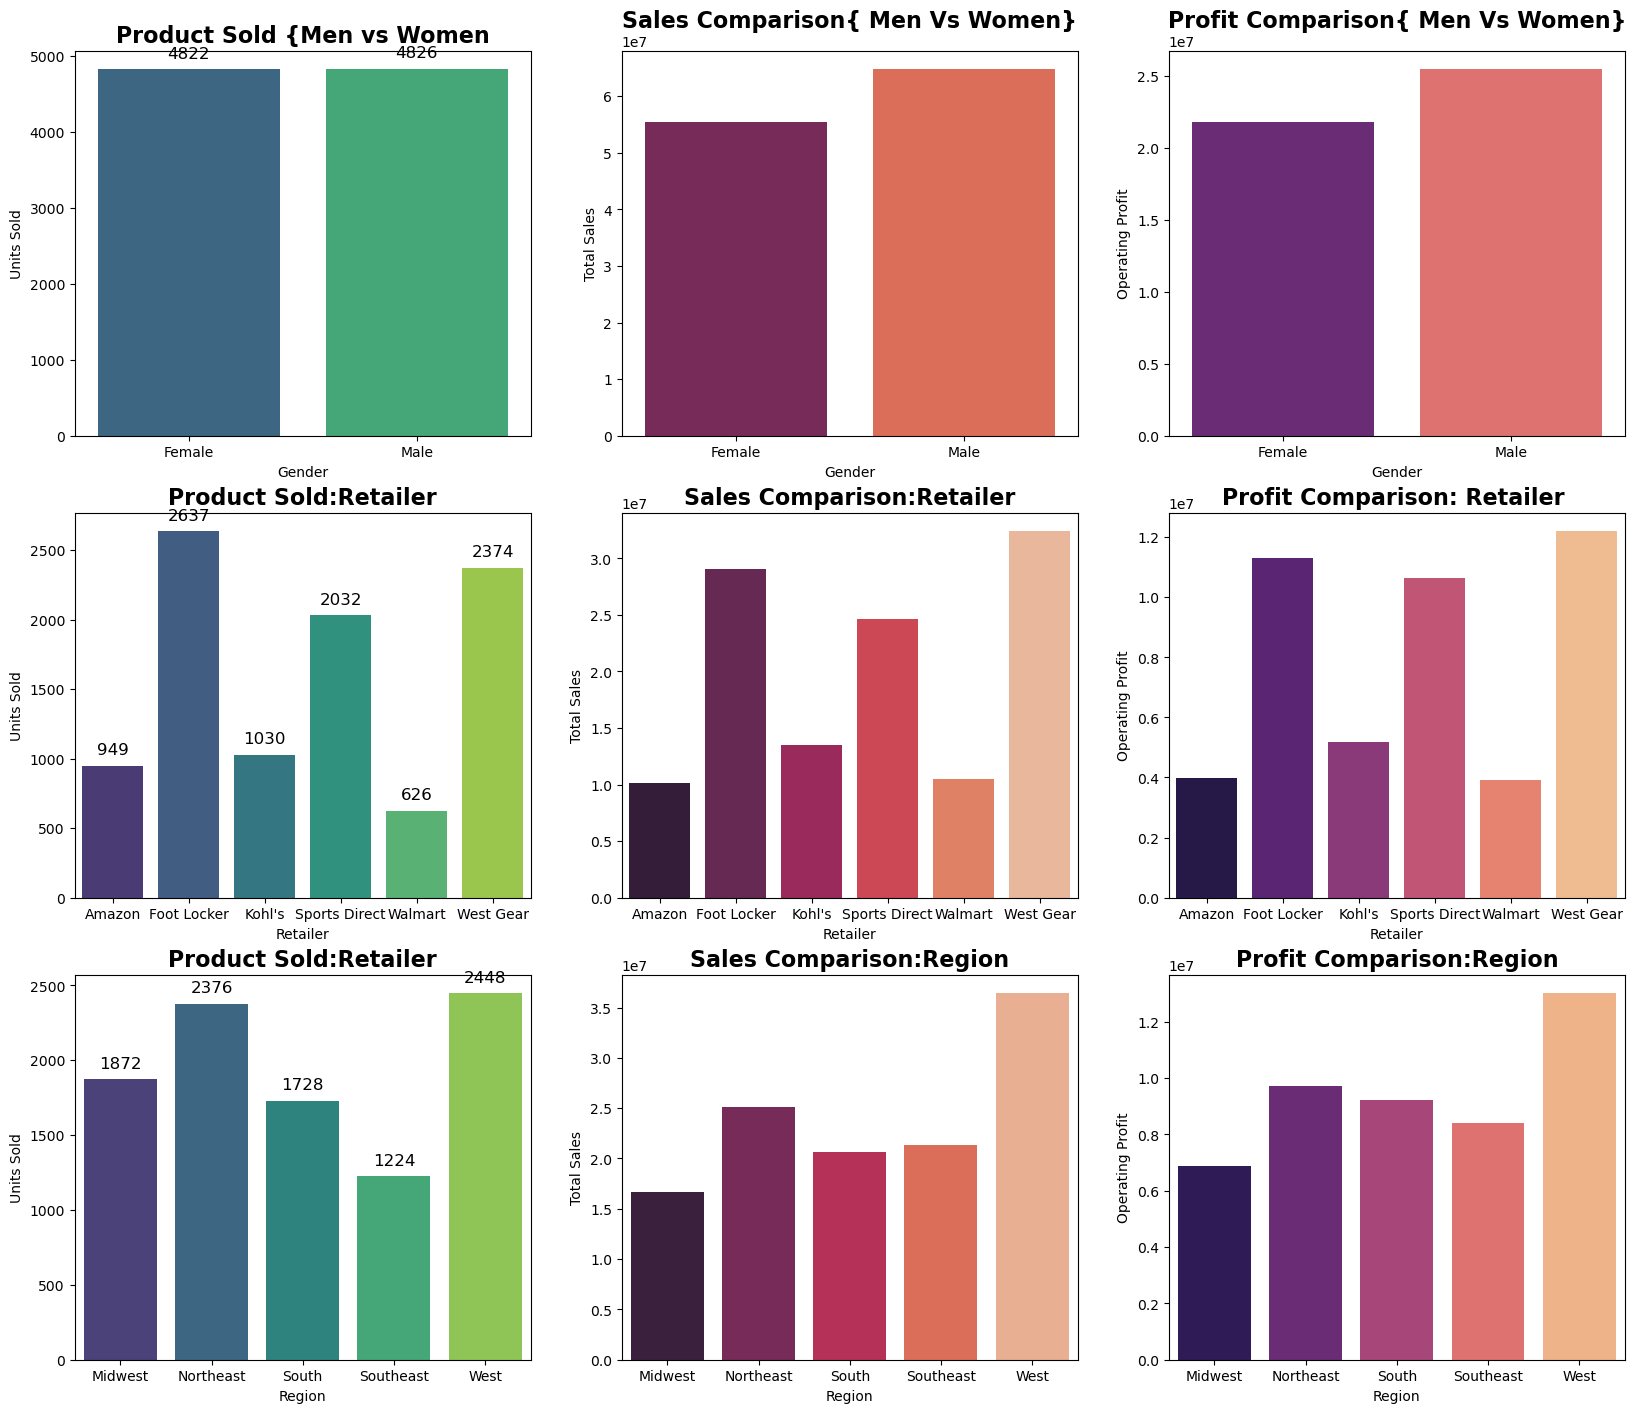

In [46]:
#GENDER
sales_by_gender = df.groupby('Gender')['Total Sales'].sum().reset_index()
Productsold_by_gender = df.groupby('Gender')['Units Sold'].count().reset_index()
profit_by_gender = df.groupby('Gender')['Operating Profit'].sum().reset_index()

#RETAILR
sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum().reset_index()
Productsold_by_retailer = df.groupby('Retailer')['Units Sold'].count().reset_index()
profit_by_retailer = df.groupby('Retailer')['Operating Profit'].sum().reset_index()
#Region
sales_by_Region = df.groupby('Region')['Total Sales'].sum().reset_index()
Productsold_by_Region = df.groupby('Region')['Units Sold'].count().reset_index()
profit_by_region = df.groupby('Region')['Operating Profit'].sum().reset_index()
 #========================================================================#

fig, axes=plt.subplots( nrows=3, ncols=3, figsize=(20,17))

#Count of product sold. Group: Gender
figure= sns.barplot(data=Productsold_by_gender  ,x="Gender" , y="Units Sold", palette='viridis',ax=axes[0,0])
for contain in figure.containers :
    figure.bar_label(contain ,padding=6, fontsize=12)
axes[0,0].set_title("Product Sold {Men vs Women", fontsize=16, fontweight="bold")

# Sales done. Group: Gender 
figure1= sns.barplot(data= sales_by_gender ,x="Gender" ,y="Total Sales" ,palette='rocket',ax=axes[0,1])
axes[0,1].set_title("Sales Comparison{ Men Vs Women}", fontsize=16, fontweight="bold")

# Profit done. Group: Gender 
figure3= sns.barplot(data= profit_by_gender ,x="Gender" ,y="Operating Profit" ,palette='magma',ax=axes[0,2])
axes[0,2].set_title("Profit Comparison{ Men Vs Women}", fontsize=16, fontweight="bold")

# Sales done. Group: Retailer
figure2= sns.barplot(data= Productsold_by_retailer ,x="Retailer" , y="Units Sold", palette='viridis',ax=axes[1,0])
for contain in figure2.containers :
    figure2.bar_label(contain, padding=6, fontsize=12)
axes[1,0].set_title("Product Sold:Retailer", fontsize=16, fontweight="bold")

# Sales done. Group : Retailer
figure3= sns.barplot(data=sales_by_retailer,x="Retailer" , y="Total Sales", palette='rocket',ax=axes[1,1])
axes[1,1].set_title("Sales Comparison:Retailer", fontsize=16, fontweight="bold")

# Profit done. Group : Retailer
figure3= sns.barplot(data= profit_by_retailer ,x="Retailer" ,y="Operating Profit" ,palette='magma',ax=axes[1,2])
axes[1,2].set_title("Profit Comparison: Retailer ", fontsize=16, fontweight="bold")

# Product sold. Group : Region
figure4= sns.barplot(data=Productsold_by_Region,x="Region" , y="Units Sold", palette='viridis',ax=axes[2,0])
for contain in figure4.containers :
    figure4.bar_label(contain, padding=6, fontsize=12)
axes[2,0].set_title("Product Sold:Retailer", fontsize=16, fontweight="bold")

# Sales done. Group : Region
figure5= sns.barplot(data=sales_by_Region,x="Region" , y="Total Sales", palette='rocket',ax=axes[2,1])
axes[2,1].set_title("Sales Comparison:Region", fontsize=16, fontweight="bold")

# Profit done. Group : Region
figure3= sns.barplot(data= profit_by_region ,x="Region" ,y="Operating Profit" ,palette='magma',ax=axes[2,2])
axes[2,2].set_title("Profit Comparison:Region", fontsize=16, fontweight="bold")

plt.show()

__Monthly Product Performance Insights__

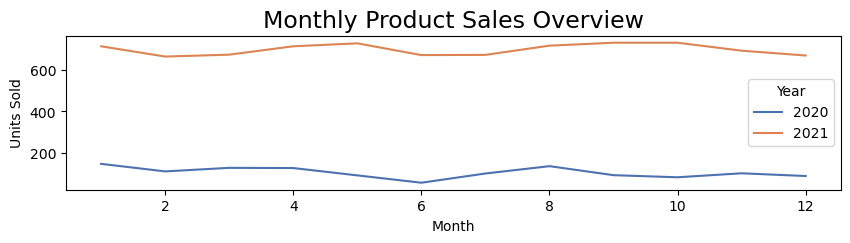

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
MonthlySales=df.groupby(["Year", "Month"])["Units Sold"].count().reset_index()
plt.figure(figsize=(10, 2))
sns.lineplot(data=MonthlySales, x="Month", y="Units Sold", hue="Year",palette="deep")
plt.title("Monthly Product Sales Overview", fontsize=17)
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.show()


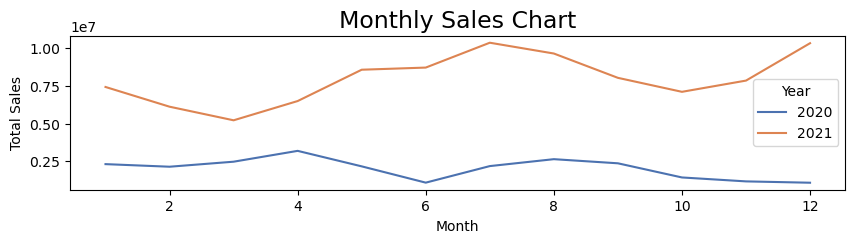

In [52]:
MonthlySales=df.groupby(["Year", "Month"])["Total Sales"].sum().reset_index()
plt.figure(figsize=(10, 2))
sns.lineplot(data=MonthlySales, x="Month", y="Total Sales", hue="Year",palette="deep")
plt.title("Monthly Sales Chart", fontsize=17)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


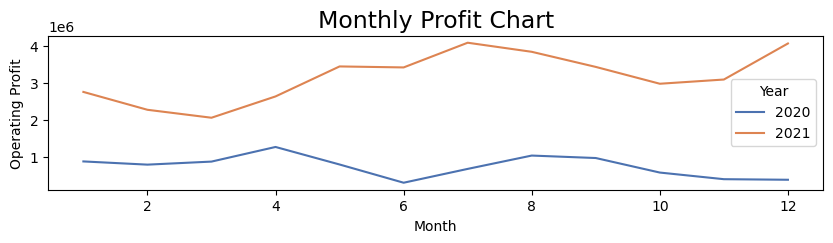

In [54]:
Monthly_Profit=df.groupby(["Month","Year"])["Operating Profit"].sum().reset_index()
plt.figure(figsize=(10, 2))
sns.lineplot(data=Monthly_Profit, x="Month", y="Operating Profit", hue="Year",palette="deep")
plt.title("Monthly Profit Chart", fontsize=17)
plt.xlabel("Month")
plt.ylabel("Operating Profit")
plt.show()

__Comparison between 2020 and 2021 sales stats__

In [57]:
df.pivot_table(index="Year", columns="Month", values="Units Sold", aggfunc="sum")

Month        1         2         3         4         5         6         7   \
Year                                                                          
2020    48333.0   37846.0   46972.0   54709.0   35705.0   16269.0   38219.0   
2021   179299.0  156113.0  143988.0  161717.0  178900.0  164745.0  180481.0   

Month        8         9         10        11        12  
Year                                                     
2020    62307.0   46125.0   30167.0   25152.0   20545.0  
2021   195414.0  182425.0  152834.0  149350.0  171246.0

In [59]:
df.pivot_table(index=["Year", "Month"], columns="Retailer", values="Units Sold", aggfunc="sum")

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
Year Month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

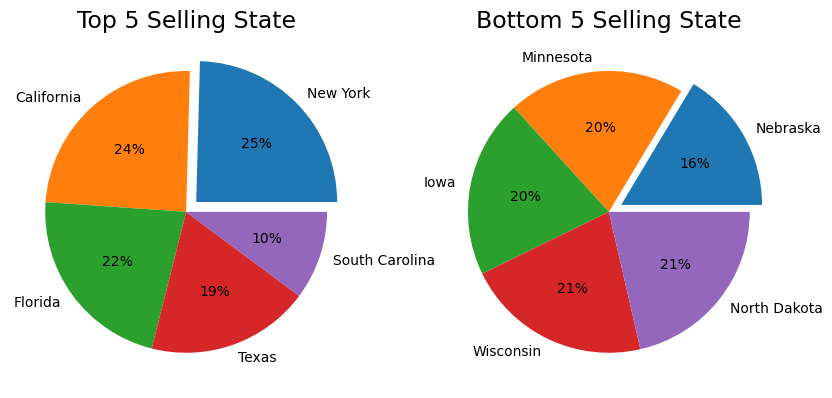

In [61]:
state_sales = df.groupby('State')['Total Sales'].sum().reset_index()
top5state=state_sales.nlargest(5, 'Total Sales')
bottom5state=state_sales.nsmallest(5, 'Total Sales')

#Defining Rows and Columns 
plt.figure(figsize=(10,6))
axes=plt.subplot(1,2,1)
axes=plt.subplot(1,2,1)
explode=[0.1,0,0,0,0]
plt.pie(top5state['Total Sales'], labels=top5state['State'],autopct='%.0f%%', explode=explode)
plt.title("Top 5 Selling State", fontsize=17)

axes=plt.subplot(1,2,2)
explode=[0.1,0,0,0,0]
plt.pie(bottom5state['Total Sales'], labels=bottom5state['State'],autopct='%.0f%%', explode=explode)
plt.title("Bottom 5 Selling State", fontsize=17)
plt.show()

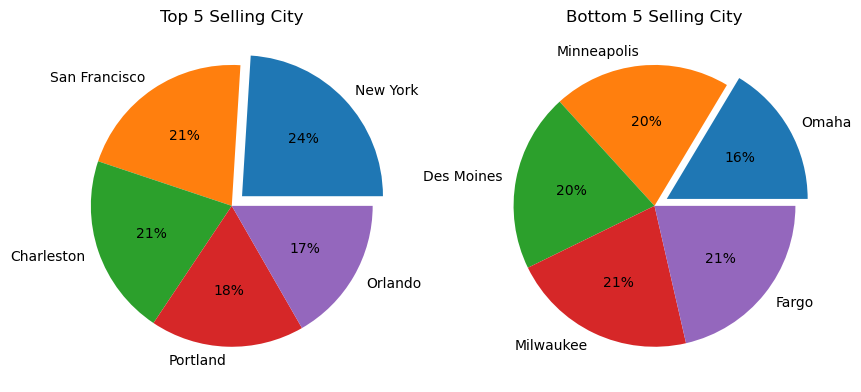

In [63]:

city_sales=df.groupby('City')['Total Sales'].sum().reset_index()
top5city=city_sales.nlargest(5, 'Total Sales')
bottom5city=city_sales.nsmallest(5, 'Total Sales')

plt.figure(figsize=(10,6))
axes=plt.subplot(1,2,1)
explode=[0.1,0,0,0,0]
plt.pie(top5city['Total Sales'], labels=top5city['City'],autopct='%.0f%%', explode=explode)
plt.title("Top 5 Selling City")

axes=plt.subplot(1,2,2)
explode=[0.1,0,0,0,0]
plt.pie(bottom5city['Total Sales'], labels=bottom5city['City'],autopct='%.0f%%', explode=explode)
plt.title("Bottom 5 Selling City")
plt.show()

__Sales Method Comparison__

In [65]:
SalesMethod=df.groupby("Sales Method")[["Total Sales",'Operating Profit']].sum().reset_index()
SalesMethod

Sales Method  Total Sales  Operating Profit
0     In-store   35664375.0       12759128.75
1       Online   44965657.0       19552537.72
2       Outlet   39536618.0       14913301.23

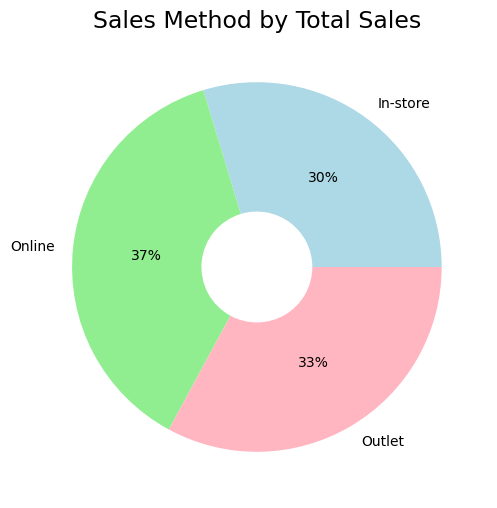

In [68]:
colors=['#ADD8E6','#90EE90','#FFB6C1']

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(SalesMethod['Total Sales'], labels=SalesMethod['Sales Method'], autopct='%.0f%%', colors=colors, wedgeprops=dict(width=0.7))
ax.set_title("Sales Method by Total Sales", fontsize=17)
plt.show()

__Scatter Plot__

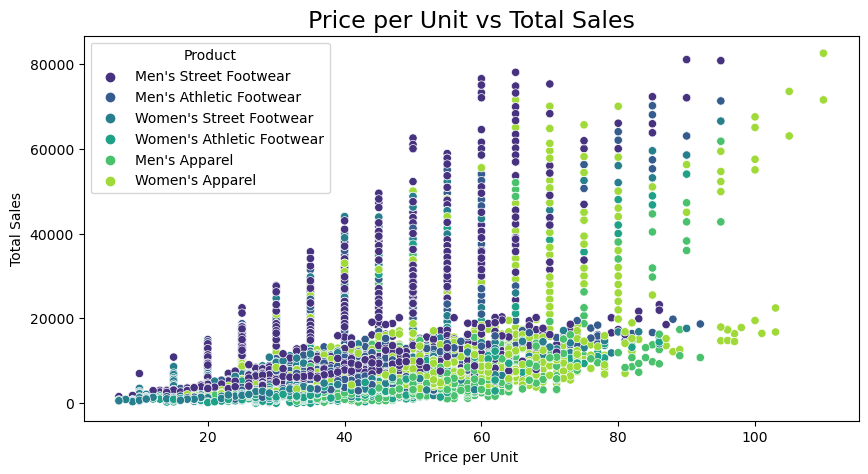

In [70]:
plt.figure(figsize=(10, 5))

scatter_plot = sns.scatterplot(data=df, x='Price per Unit', y='Total Sales',hue='Product', palette='viridis')

scatter_plot.set_title('Price per Unit vs Total Sales', fontsize=17)

plt.show()

__TREEMAP__

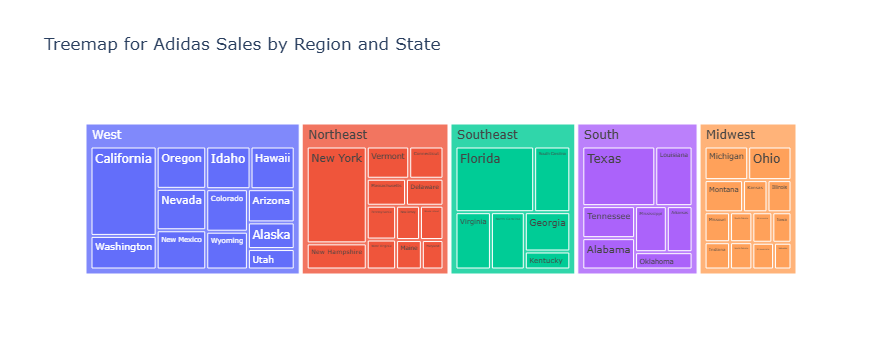

In [73]:
px.treemap(df,values='Total Sales', path=['Region', 'State'],
                 title='Treemap for Adidas Sales by Region and State')

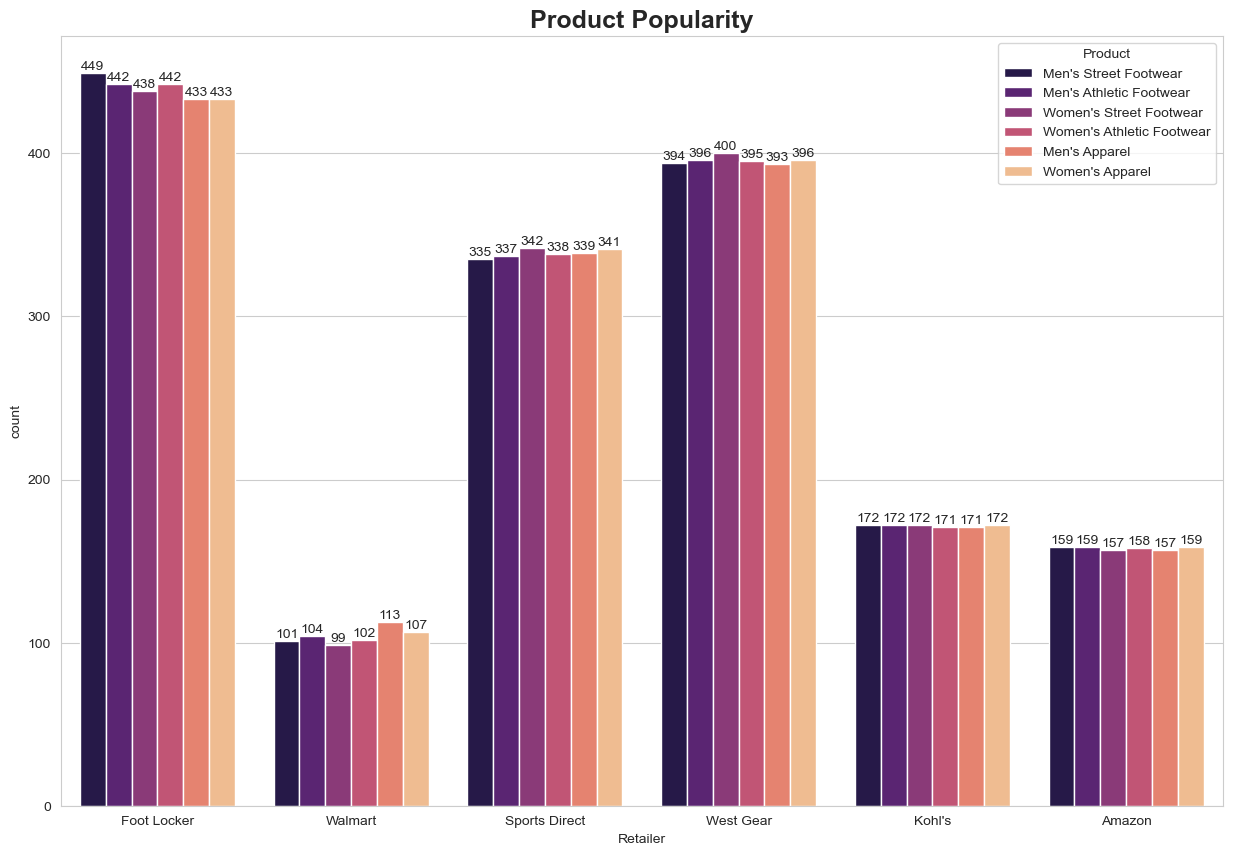

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
figure=sns.countplot(x="Retailer", hue="Product", data=df , palette="magma")
for container in figure.containers:
    figure.bar_label(container)
figure.set_title("Product Popularity", fontsize=18, fontweight="bold")
plt.show()

__Year versus Year Sales and Profit__

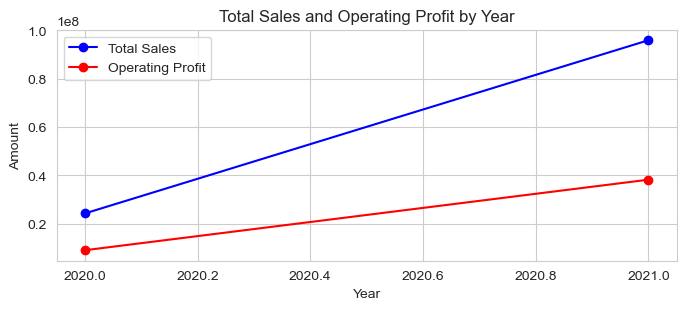

In [77]:
profityear=df.groupby("Year")[["Total Sales","Operating Profit"]].sum().reset_index()
profityear
plt.figure(figsize=(8, 3))

plt.plot(profityear['Year'], profityear['Total Sales'], marker='o', color='b', label='Total Sales')
plt.plot(profityear['Year'], profityear['Operating Profit'], marker='o', color='r', label='Operating Profit')

plt.title('Total Sales and Operating Profit by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

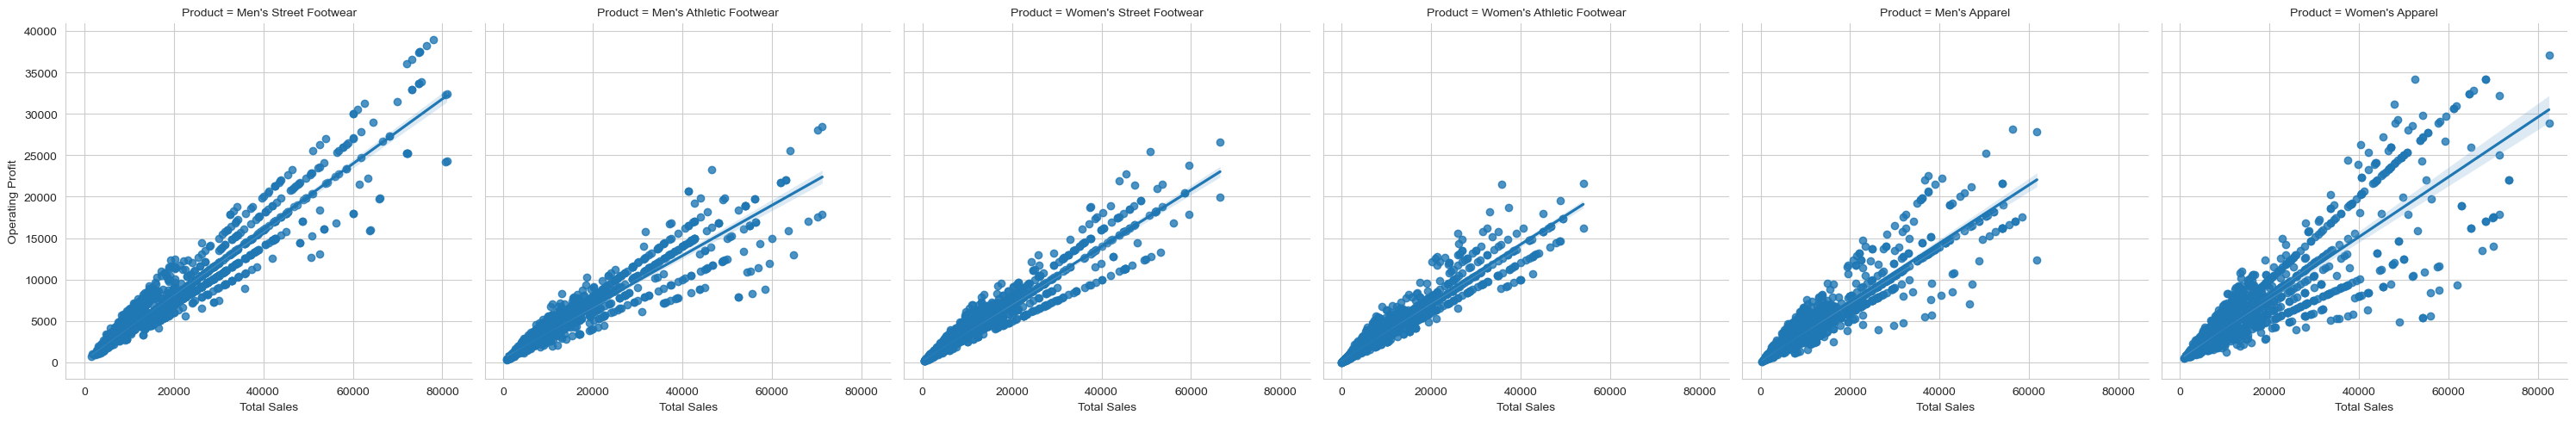

In [79]:
sns.lmplot(data = df , x= "Total Sales" , y = "Operating Profit" ,col="Product")
plt.show()